In [1]:
import tensorflow as tf
from model import Model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.reset_default_graph()

In [3]:
batch_size = 64
rnn_hidden = 16
output_hidden = 64

In [4]:
model_config = {'rnn_hidden' : rnn_hidden,
                'output_hidden' : output_hidden,
               }
model_dir = ['{}-{}'.format(key, model_config[key]) for key in model_config.keys()]
model_dir = '_'.join(model_dir)

In [5]:
model_dir

'rnn_hidden-16_output_hidden-64'

In [6]:
def get_inputs(data_type):
    data = np.load('data/data_{}.npz'.format(data_type))

    X = data['X'].astype(np.float32)

    y = np.expand_dims(data['y'].astype(np.float32), 1)
    return X, y

In [7]:
test_inputs, test_targets = get_inputs('test')

In [8]:
trn_inputs, trn_targets = get_inputs('train')

In [9]:
inputs = tf.placeholder(tf.float32, [None, 5, 9])
targets = tf.placeholder(tf.float32, [None, 1, 2])

In [10]:
with tf.variable_scope('Model'):         
    with tf.name_scope('Train'):
        data_inputs = {'inputs':inputs, 'targets': targets}
        model = Model(data_inputs, rnn_hidden=rnn_hidden, output_hidden=output_hidden, )

TypeError: __init__() missing 2 required positional arguments: 'number_of_layers' and 'keep_prob'

In [11]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [12]:
saver = tf.train.Saver()

In [13]:
latest_ckpt = tf.train.latest_checkpoint('model/{}'.format(model_dir))

In [14]:
latest_ckpt

'model/num_layers-2_rnn_hidden-16_output_hidden-64_dropout_keep-0.8/model.ckpt-12'

In [15]:
saver.restore(sess, latest_ckpt)

INFO:tensorflow:Restoring parameters from model/num_layers-2_rnn_hidden-16_output_hidden-64_dropout_keep-0.8/model.ckpt-12


In [16]:
pred = sess.run(model.pred, feed_dict={inputs:test_inputs})

In [17]:
pred_trn = sess.run(model.pred, feed_dict={inputs:trn_inputs})

In [18]:
def mape_loss(pred, target, threshold):
    mask = np.abs(target) > threshold
    print(len(pred), sum(mask))
    target = target[mask]
    pred = pred[mask]
    loss = np.mean(np.abs(pred - target) / np.abs(target))
    return loss

In [19]:
np.percentile(pred[:,:,0], [0, 25, 50, 75, 100])

array([-3.45771885,  0.01913966,  0.12938078,  0.32214811,  4.15845203])

In [20]:
np.percentile(pred_trn[:,:,0], [0, 25, 50, 75, 100])

array([ -1.32358561e+01,  -1.42009443e+00,   4.45946679e-03,
         9.56649065e-01,   7.30785179e+00])

In [21]:
np.percentile(pred[:,:,1], [0, 25, 50, 75, 100])

array([-0.0818318 ,  0.01208148,  0.04149259,  0.09493728,  1.53892338])

In [22]:
np.percentile(pred_trn[:,:,1], [0, 25, 50, 75, 100])

array([-0.21967863, -0.01040357,  0.01499968,  0.13668114,  7.16917372])

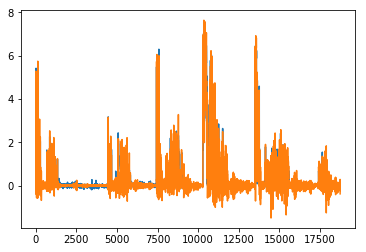

In [23]:
plt.plot(np.arange(len(pred_trn)), pred_trn[:, 0, 1])
plt.plot(np.arange(len(pred_trn)), trn_targets[:, 0, 1])

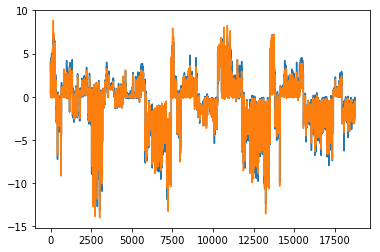

In [24]:
plt.plot(np.arange(len(pred_trn)), pred_trn[:, 0, 0])
plt.plot(np.arange(len(pred_trn)), trn_targets[:, 0, 0])

In [25]:
len(pred)

412

In [26]:
len(test_targets)

412

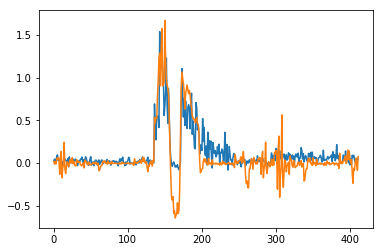

In [27]:
plt.plot(np.arange(len(pred)), pred[:, 0, 1])
plt.plot(np.arange(len(pred)), test_targets[:, 0, 1])

In [34]:
test_targets.shape

(412, 1, 2)

ValueError: x and y must have same first dimension, but have shapes (412,) and (50,)

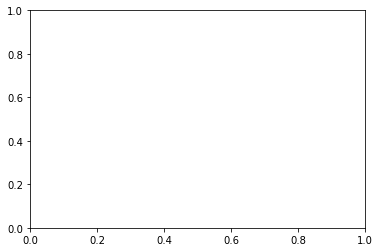

In [36]:
plt.plot(np.arange(len(pred)), pred[:, 0, 1])
plt.plot(np.arange(len(pred)), test_targets[:, 0, 1])

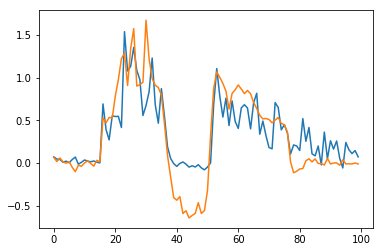

In [28]:
plt.plot(np.arange(len(pred[:100])), pred[120:220, 0, 1])
plt.plot(np.arange(len(pred[:100])), test_targets[120:220, 0, 1])

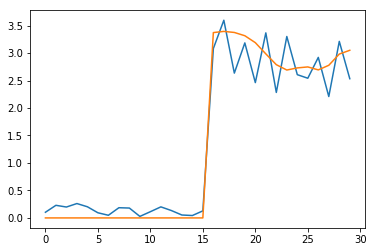

In [29]:
plt.plot(np.arange(len(pred[:30])), pred[120:150, 0, 0])
plt.plot(np.arange(len(pred[:30])), test_targets[120:150, 0, 0])

In [30]:
mape_loss(pred[:,:,1], test_targets[:,:,1], 0.5)

412 [48]


0.39534464

In [31]:
mape_loss(pred[:,:,0], test_targets[:,:,0], 0.5)

412 [143]


0.18412966

In [ ]:
tf.contrib.rnn.GRUCell()

In [ ]:
tf.contrib.layers.fully_connected()

In [18]:
layer_size = [1, 2, 3]
rnn_hidden = [64, 512]
batch_size = [32]
layer_output = [1, 2]
output_hidden = [64, 512]
dropout_keep = [0.7, 1.0]
cell = ['GRU', 'LSTM', 'LNLSTM']
directional = ['bidirectional']

In [20]:
import tensorflow as tf

In [19]:
for a in layer_size:
    for b in rnn_hidden:
        for c in batch_size:
            for d in layer_output:
                for e in output_hidden:
                    for f in dropout_keep:
                        for g in cell:
                            for h in directional:
                                print('l-{}_r-{}_b-{}_lo-{}_o-{}_d-{}_c-{}_dir-{}'.format(a, b, c, d, e, f, g, h))

l-1_r-64_b-32_lo-1_o-64_d-0.7_c-GRU_dir-bidirectional
l-1_r-64_b-32_lo-1_o-64_d-0.7_c-LSTM_dir-bidirectional
l-1_r-64_b-32_lo-1_o-64_d-0.7_c-LNLSTM_dir-bidirectional
l-1_r-64_b-32_lo-1_o-64_d-1.0_c-GRU_dir-bidirectional
l-1_r-64_b-32_lo-1_o-64_d-1.0_c-LSTM_dir-bidirectional
l-1_r-64_b-32_lo-1_o-64_d-1.0_c-LNLSTM_dir-bidirectional
l-1_r-64_b-32_lo-1_o-512_d-0.7_c-GRU_dir-bidirectional
l-1_r-64_b-32_lo-1_o-512_d-0.7_c-LSTM_dir-bidirectional
l-1_r-64_b-32_lo-1_o-512_d-0.7_c-LNLSTM_dir-bidirectional
l-1_r-64_b-32_lo-1_o-512_d-1.0_c-GRU_dir-bidirectional
l-1_r-64_b-32_lo-1_o-512_d-1.0_c-LSTM_dir-bidirectional
l-1_r-64_b-32_lo-1_o-512_d-1.0_c-LNLSTM_dir-bidirectional
l-1_r-64_b-32_lo-2_o-64_d-0.7_c-GRU_dir-bidirectional
l-1_r-64_b-32_lo-2_o-64_d-0.7_c-LSTM_dir-bidirectional
l-1_r-64_b-32_lo-2_o-64_d-0.7_c-LNLSTM_dir-bidirectional
l-1_r-64_b-32_lo-2_o-64_d-1.0_c-GRU_dir-bidirectional
l-1_r-64_b-32_lo-2_o-64_d-1.0_c-LSTM_dir-bidirectional
l-1_r-64_b-32_lo-2_o-64_d-1.0_c-LNLSTM_dir-bidirectiona